In [1]:
# !pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime, timedelta
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
%matplotlib inline
import hvplot.pandas

ModuleNotFoundError: No module named 'dotenv'

In [ ]:
# # Obtain DataFrame of hourly close price of Square stock
# sq_1hr = yf.download(tickers='SQ', start='2019-09-01', interval='1h')
# sq_1hr.drop(columns = ['Open','High','Low','Adj Close','Volume'], inplace = True)
# sq_1hr.reset_index(inplace = True)
# sq_1hr.rename(columns = {'index' : 'DateTime'}, inplace = True)
# sq_1hr.set_index(pd.to_datetime(sq_1hr['DateTime'], infer_datetime_format = True), inplace = True)
# sq_1hr.drop(columns = 'DateTime', inplace = True)
# sq_1hr

In [ ]:
# Obtain DataFrame of daily close price of Square stock
sq_daily = yf.download(tickers='SQ', start='2019-09-01', interval='1d')
sq_daily.drop(columns = ['Open','High','Low','Adj Close','Volume'], inplace = True)
sq_daily.reset_index(inplace = True)
sq_daily.rename(columns = {'index' : 'Date'}, inplace = True)
sq_daily.set_index(pd.to_datetime(sq_daily['Date'], infer_datetime_format = True), inplace = True)
sq_daily.drop(columns = 'Date', inplace = True)
sq_daily

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2019-09-03,61.130001
2019-09-04,61.169998
2019-09-05,63.020000
2019-09-06,62.000000
2019-09-09,61.470001
2019-09-10,60.549999
2019-09-11,59.200001
2019-09-12,57.790001
2019-09-13,58.290001


In [ ]:
# Use the `pct_change` function to calculate hourly returns of SQ
sq_returns_1d = sq_daily.pct_change().dropna()

# Display sample data
sq_returns_1d.head()

,Close
Date,
2019-09-04,0.000654
2019-09-05,0.030244
2019-09-06,-0.016185
2019-09-09,-0.008548
2019-09-10,-0.014967


In [ ]:
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

In [ ]:
# Use newsapi client to get most relevant 20 headlines per day in the past month
def get_headlines(keyword):
    all_headlines = []
    all_dates = []    
    date = datetime.strptime(current_date[:10], "%Y-%m-%d")
    end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
    print(f"Fetching news about '{keyword}'")
    print("*" * 30)
    while date > end_date:
        print(f"retrieving news from: {date}")
        articles = newsapi.get_everything(
            q=keyword,
            from_param=str(date)[:10],
            to=str(date)[:10],
            language="en",
            sort_by="relevancy",
            page=1,
        )
        headlines = []
        for i in range(0, len(articles["articles"])):
            headlines.append(articles["articles"][i]["title"])
        all_headlines.append(headlines)
        all_dates.append(date)
        date = date - timedelta(days=1)
    return all_headlines, all_dates

In [ ]:
sq_headlines, dates = get_headlines("square")

Fetching news about 'square'
******************************
retrieving news from: 2021-08-07 00:00:00
retrieving news from: 2021-08-06 00:00:00
retrieving news from: 2021-08-05 00:00:00
retrieving news from: 2021-08-04 00:00:00
retrieving news from: 2021-08-03 00:00:00
retrieving news from: 2021-08-02 00:00:00
retrieving news from: 2021-08-01 00:00:00
retrieving news from: 2021-07-31 00:00:00
retrieving news from: 2021-07-30 00:00:00
retrieving news from: 2021-07-29 00:00:00
retrieving news from: 2021-07-28 00:00:00
retrieving news from: 2021-07-27 00:00:00
retrieving news from: 2021-07-26 00:00:00
retrieving news from: 2021-07-25 00:00:00
retrieving news from: 2021-07-24 00:00:00
retrieving news from: 2021-07-23 00:00:00
retrieving news from: 2021-07-22 00:00:00
retrieving news from: 2021-07-21 00:00:00
retrieving news from: 2021-07-20 00:00:00
retrieving news from: 2021-07-19 00:00:00
retrieving news from: 2021-07-18 00:00:00
retrieving news from: 2021-07-17 00:00:00
retrieving news 

In [ ]:
# Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def headline_sentiment_summarizer_avg(headlines):
    sentiment = []
    for day in headlines:
        day_score = []
        for h in day:
            if h == None:
                continue
            else:
                day_score.append(sid.polarity_scores(h)["compound"])
        sentiment.append(sum(day_score) / len(day_score))
    return sentiment

In [ ]:
# Get averages of each topics sentiment
sq_avg_sentiment = headline_sentiment_summarizer_avg(sq_headlines)

In [ ]:

# Combine Sentiment Averages into DataFrame
topic_sentiments = pd.DataFrame(
    {
        "sq_avg_sentiment": sq_avg_sentiment,
    }
)
# Set the index value of the sentiment averages DataFrame to be the series of dates.
topic_sentiments.index = pd.to_datetime(dates)

# Merge with SQ daily returns
topic_sentiments = sq_returns_1d.join(topic_sentiments).dropna(how="any")

topic_sentiments.rename(columns = {'Close' : 'Daily Return'}, inplace = True)

display(topic_sentiments)

,Daily Return,sq_avg_sentiment
Date,,
2021-07-09,0.025392,0.074360
2021-07-12,0.006036,0.036140
2021-07-13,-0.007890,0.004490
2021-07-14,-0.010065,0.085575
2021-07-15,-0.016067,-0.153820
2021-07-16,0.010036,-0.013570
2021-07-19,-0.016125,-0.116490
2021-07-20,0.054688,0.016330
2021-07-21,0.043738,-0.029480


In [ ]:
topic_sentiments.corr().style.background_gradient()

,Daily Return,sq_avg_sentiment
Daily Return,1,0.0624055
sq_avg_sentiment,0.0624055,1


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X = topic_sentiments['sq_avg_sentiment'].values.reshape(-1,1)
y = topic_sentiments['Daily Return'].values.reshape(-1,1)

In [ ]:
# X.
# y

array([[ 0.02539214],
       [ 0.00603583],
       [-0.00788993],
       [-0.010065  ],
       [-0.01606693],
       [ 0.01003572],
       [-0.01612497],
       [ 0.05468783],
       [ 0.04373757],
       [ 0.01298346],
       [ 0.0130857 ],
       [-0.00761367],
       [-0.03916178],
       [ 0.02733083],
       [-0.01287648],
       [-0.0314165 ],
       [ 0.10159351],
       [-0.01061023],
       [-0.0113918 ],
       [ 0.05776587],
       [-0.02381034]])

In [ ]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)
X_scaler.fit(X_test)

y_scaler.fit(y_test)
y_scaler.fit(y_train)

StandardScaler()

In [ ]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
# Create a sequential model
neuron = Sequential()

In [ ]:
# First layer
number_inputs = 1
number_hidden_nodes = 1

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

In [ ]:
# Output layer
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))

In [ ]:
# Model summary
neuron.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fitting the model with linear dummy data
model = neuron.fit(X_train_scaled, y_train_scaled, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 226ms/step - loss: 0.4530 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 503us/step - loss: 0.4513 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 502us/step - loss: 0.4505 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 503us/step - loss: 0.4462 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 0.4453 - ac

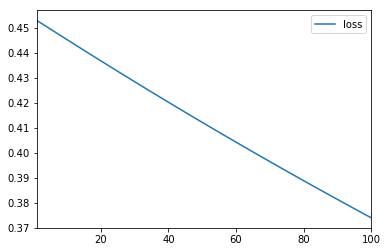

In [ ]:
# Create a DataFrame with the history dictionary
df = pd.DataFrame(model.history, index=range(1, len(model.history["loss"]) + 1))

# Plot the loss
df.plot(y="loss")

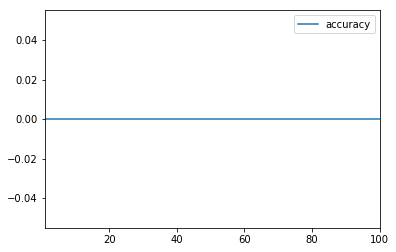

In [ ]:
# Plot the accuracy
df.plot(y="accuracy")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d12c285c-6789-4c45-9ad7-1be9b4d60622' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>